In [1]:
import numpy as np
import info_theory as it
import err_exponents as err_exp
import matplotlib.pyplot as plt

## Compute error exponents

In [2]:
p = 0.25

capacity = it.capacity_bsc(p)
c1 = it.c1_bsc(p)
R_vec = np.linspace(0.0001, capacity, 100)
R_vec[-1] = capacity
R_size = len(R_vec)
div = 1000
bound = 0.05

err_exp_burnashev =np.zeros((R_size), dtype=float)
err_exp_random_coding = np.zeros((R_size), dtype=float)
err_exp_sphere_packing = np.zeros((R_size), dtype=float)

for i in range(R_size):
    rate = R_vec[i]
    err_exp_burnashev[i] = err_exp.burnashev_VL(p, rate)
    err_exp_random_coding[i] = err_exp.random_coding(p, rate, x0=p+0.001)
    err_exp_sphere_packing[i] = err_exp.sphere_packing_bound(p, rate, x0=p+0.001)

In [3]:
R_vec1 = np.linspace(0, capacity, 20)
R_vec1[-1] = capacity
R_size1 = len(R_vec1)

err_exp_henderson = np.zeros((R_size1), dtype=float)

for i in range(R_size1):
    rate = R_vec1[i]
    err_exp_henderson[i] = err_exp.henderson_FL(p, rate, div, bound)

## Plots of error exponents

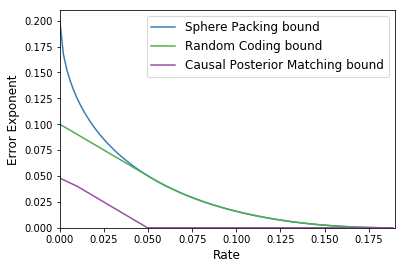

In [14]:
#colors 
#e41a1c
#377eb8
#4daf4a
#984ea3

width = 1.5

# plotting the error exponent 
#burnashev, = plt.plot(R_vec, err_exp_burnashev, color='#e41a1c', linewidth = width, label = 'Burnashev VL bound') 
sphere_packing, = plt.plot(R_vec, err_exp_sphere_packing, color='#377eb8', linewidth = width, label = 'Sphere Packing bound') 
random_coding, = plt.plot(R_vec, err_exp_random_coding, color='#4daf4a', linewidth = width, label = 'Random Coding bound') 
henderson, = plt.plot(R_vec1, err_exp_henderson, color='#984ea3', linewidth = width, label = 'Causal Posterior Matching bound') 
  
# setting x and y axis range 
#plt.ylim(0, c1+0.001)
plt.ylim(0, 0.21)
plt.xlim(0, capacity+0.001)
    
# naming the x axis 
plt.xlabel('Rate', fontsize=12) 
# naming the y axis 
plt.ylabel('Error Exponent', fontsize=12) 

# giving a legend to the graph
#plt.legend([burnashev, sphere_packing, random_coding, henderson,], 
          #['Burnashev VL bound', 'Sphere Packing bound', 'Random Coding bound', 'Causal Posterior Matching bound'])
plt.legend(fontsize=12)

# giving a title to the graph 
#plt.title('Error Exponent Vs Rate') 
  
#plt.savefig('causal_PM_err_exp.eps', dpi = 450)
plt.savefig('causal_PM_err_exp1.png', dpi= 450)
# function to show the plot 
plt.show() 